In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
spotify = pd.read_json('/content/drive/MyDrive/Spotify/MyData/StreamingHistory1.json')
spotify

,endTime,artistName,trackName,msPlayed
0,2021-03-25 13:11,Wry,Man in the Mirror - Electropaulo Rmx,68943
1,2021-03-25 13:31,Vintage Culture,Várias Queixas - Radio Edit,155702
2,2021-03-25 13:34,Cypress Hill,Champion Sound,183560
3,2021-03-25 13:35,Rita Benneditto,Com o Afeto das Canções,92897
4,2021-03-25 13:35,Rodrigo Sha,Do Guarani Ao Guaraná,8340
...,...,...,...,...
6621,2021-07-19 21:26,Mary J. Blige,Family Affair,265866
6622,2021-07-19 21:30,Akon,I Wanna Love You,247061
6623,2021-07-19 21:34,Eve,Got What You Need,232015
6624,2021-07-19 21:37,DMX,Party Up,172977


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     6626 non-null   object
 1   artistName  6626 non-null   object
 2   trackName   6626 non-null   object
 3   msPlayed    6626 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 207.2+ KB


In [ ]:
#mudando a endTime
spotify['endTime'] = spotify['endTime'].astype('datetime64')

In [ ]:
# Acrescentando  colunas no dataset a partir da endtime
spotify['ano'] = spotify['endTime'].dt.year
spotify['mes'] = spotify['endTime'].dt.month
spotify['dia'] = spotify['endTime'].dt.day
spotify['tempo'] = spotify['endTime'].dt.time
spotify['horas'] = spotify['endTime'].dt.hour
spotify['nomeDia'] = spotify['endTime'].map( lambda x: x.day_name())

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     6626 non-null   datetime64[ns]
 1   artistName  6626 non-null   object        
 2   trackName   6626 non-null   object        
 3   msPlayed    6626 non-null   int64         
 4   ano         6626 non-null   int64         
 5   mes         6626 non-null   int64         
 6   dia         6626 non-null   int64         
 7   tempo       6626 non-null   object        
 8   horas       6626 non-null   int64         
 9   nomeDia     6626 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 517.8+ KB


In [ ]:
# Acrescentando coluna de duração em Horas e em minutos 
spotify['tempoEscutado(h)'] = spotify['msPlayed'].map(lambda x: x/(3600000) ).round(4)
spotify['tempoEscutado(min)'] = spotify['msPlayed'].map(lambda x: x/60000).round(4)
spotify.head()

,endTime,artistName,trackName,msPlayed,ano,mes,dia,tempo,horas,nomeDia,tempoEscutado(h),tempoEscutado(min)
0,2021-03-25 13:11:00,Wry,Man in the Mirror - Electropaulo Rmx,68943,2021,3,25,13:11:00,13,Thursday,0.0192,1.1490
1,2021-03-25 13:31:00,Vintage Culture,Várias Queixas - Radio Edit,155702,2021,3,25,13:31:00,13,Thursday,0.0433,2.5950
2,2021-03-25 13:34:00,Cypress Hill,Champion Sound,183560,2021,3,25,13:34:00,13,Thursday,0.0510,3.0593
3,2021-03-25 13:35:00,Rita Benneditto,Com o Afeto das Canções,92897,2021,3,25,13:35:00,13,Thursday,0.0258,1.5483
4,2021-03-25 13:35:00,Rodrigo Sha,Do Guarani Ao Guaraná,8340,2021,3,25,13:35:00,13,Thursday,0.0023,0.1390


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   endTime             6626 non-null   datetime64[ns]
 1   artistName          6626 non-null   object        
 2   trackName           6626 non-null   object        
 3   msPlayed            6626 non-null   int64         
 4   ano                 6626 non-null   int64         
 5   mes                 6626 non-null   int64         
 6   dia                 6626 non-null   int64         
 7   tempo               6626 non-null   object        
 8   horas               6626 non-null   int64         
 9   nomeDia             6626 non-null   object        
 10  tempoEscutado(h)    6626 non-null   float64       
 11  tempoEscutado(min)  6626 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 621.3+ KB


In [ ]:
spotify.describe()

,msPlayed,ano,mes,dia,horas,tempoEscutado(h),tempoEscutado(min)
count,6.626000e+03,6626.0,6626.000000,6626.000000,6626.000000,6626.000000,6626.000000
mean,2.006474e+05,2021.0,5.148053,14.889979,15.541654,0.055735,3.344126
std,1.193147e+05,0.0,1.162285,8.683455,6.074320,0.033143,1.988579
min,0.000000e+00,2021.0,3.000000,1.000000,0.000000,0.000000,0.000000
25%,1.562695e+05,2021.0,4.000000,8.000000,14.000000,0.043400,2.604475
50%,2.091820e+05,2021.0,5.000000,14.000000,17.000000,0.058100,3.486350
75%,2.501298e+05,2021.0,6.000000,22.000000,20.000000,0.069475,4.168875
max,3.866503e+06,2021.0,7.000000,31.000000,23.000000,1.074000,64.441700


In [ ]:
# dropando os podcast
df_f = spotify.loc[(spotify['artistName'] == 'Tenho Dado Podcast') | (spotify['artistName'] == 'Data Hackers')]
spotify = spotify.drop(df_f.index)

In [ ]:
# quantidade unicas de artistasName 
len(spotify['artistName'].unique().tolist())

1423

In [ ]:
# qtd unicas de trackName
len(spotify['trackName'].unique().tolist())

3542

In [ ]:
spotify

,endTime,artistName,trackName,msPlayed,ano,mes,dia,tempo,horas,nomeDia,tempoEscutado(h),tempoEscutado(min)
0,2021-03-25 13:11:00,Wry,Man in the Mirror - Electropaulo Rmx,68943,2021,3,25,13:11:00,13,Thursday,0.0192,1.1490
1,2021-03-25 13:31:00,Vintage Culture,Várias Queixas - Radio Edit,155702,2021,3,25,13:31:00,13,Thursday,0.0433,2.5950
2,2021-03-25 13:34:00,Cypress Hill,Champion Sound,183560,2021,3,25,13:34:00,13,Thursday,0.0510,3.0593
3,2021-03-25 13:35:00,Rita Benneditto,Com o Afeto das Canções,92897,2021,3,25,13:35:00,13,Thursday,0.0258,1.5483
4,2021-03-25 13:35:00,Rodrigo Sha,Do Guarani Ao Guaraná,8340,2021,3,25,13:35:00,13,Thursday,0.0023,0.1390
...,...,...,...,...,...,...,...,...,...,...,...,...
6621,2021-07-19 21:26:00,Mary J. Blige,Family Affair,265866,2021,7,19,21:26:00,21,Monday,0.0739,4.4311
6622,2021-07-19 21:30:00,Akon,I Wanna Love You,247061,2021,7,19,21:30:00,21,Monday,0.0686,4.1177
6623,2021-07-19 21:34:00,Eve,Got What You Need,232015,2021,7,19,21:34:00,21,Monday,0.0644,3.8669
6624,2021-07-19 21:37:00,DMX,Party Up,172977,2021,7,19,21:37:00,21,Monday,0.0480,2.8830


In [ ]:
artistas = set(spotify['artistName'].tolist())
artistas = list(artistas)
len(artistas)

1423

In [ ]:
musicas = spotify[['trackName','artistName']]
musicas

,trackName,artistName
0,Man in the Mirror - Electropaulo Rmx,Wry
1,Várias Queixas - Radio Edit,Vintage Culture
2,Champion Sound,Cypress Hill
3,Com o Afeto das Canções,Rita Benneditto
4,Do Guarani Ao Guaraná,Rodrigo Sha
...,...,...
6621,Family Affair,Mary J. Blige
6622,I Wanna Love You,Akon
6623,Got What You Need,Eve
6624,Party Up,DMX


Text(0.5, 0, 'quantidade')

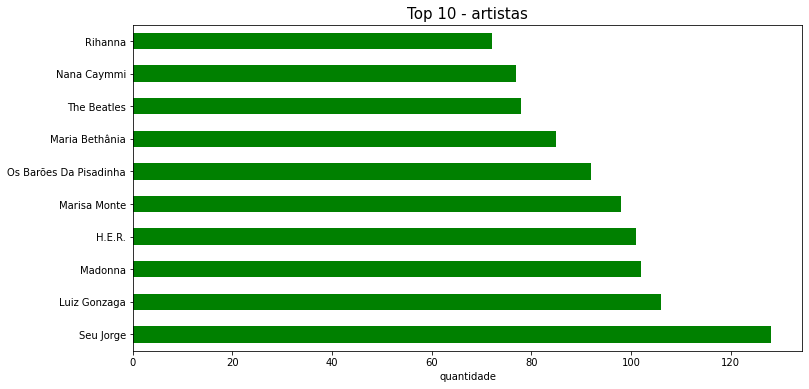

In [ ]:
# Top 10 - Artistas

artista = spotify['artistName'].value_counts().head(10)
artista.plot(kind='barh', figsize=(12,6), grid = False, rot=0, color="green")
plt.title('Top 10 - artistas',size=15)
plt.xlabel('quantidade',size=10)

Text(0.5, 0, 'quantidade')

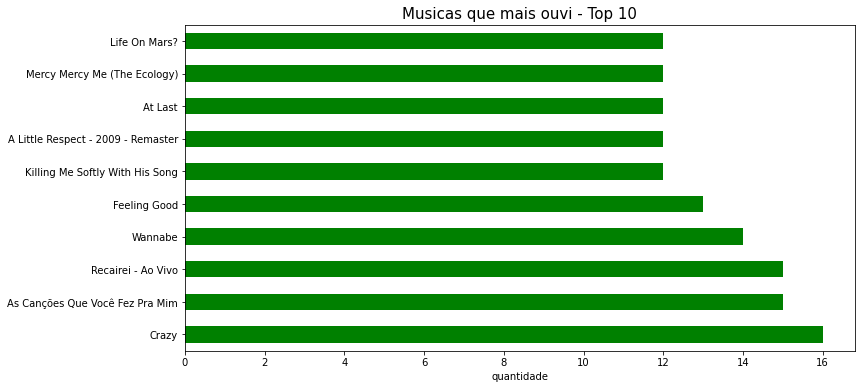

In [ ]:
# Top 10 músicas
musica = spotify['trackName'].value_counts().head(10)
musica.plot(kind='barh', figsize=(12,6), grid = False, rot=0, color="green")
plt.title('Musicas que mais ouvi - Top 10',size=15)
plt.xlabel('quantidade',size=10)

In [ ]:
musica.to_csv('/content/musica.csv')

In [ ]:
spotify = spotify.reset_index()
spotify.head()

,index,endTime,artistName,trackName,msPlayed,ano,mes,dia,tempo,horas,nomeDia,tempoEscutado(h),tempoEscutado(min)
0,0,2021-03-25 13:11:00,Wry,Man in the Mirror - Electropaulo Rmx,68943,2021,3,25,13:11:00,13,Thursday,0.0192,1.1490
1,1,2021-03-25 13:31:00,Vintage Culture,Várias Queixas - Radio Edit,155702,2021,3,25,13:31:00,13,Thursday,0.0433,2.5950
2,2,2021-03-25 13:34:00,Cypress Hill,Champion Sound,183560,2021,3,25,13:34:00,13,Thursday,0.0510,3.0593
3,3,2021-03-25 13:35:00,Rita Benneditto,Com o Afeto das Canções,92897,2021,3,25,13:35:00,13,Thursday,0.0258,1.5483
4,4,2021-03-25 13:35:00,Rodrigo Sha,Do Guarani Ao Guaraná,8340,2021,3,25,13:35:00,13,Thursday,0.0023,0.1390


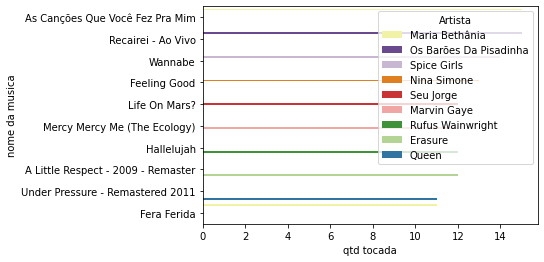

In [ ]:
# Quantidade de vezes que a musica tocou separado por artista e musica
musica_artista = spotify[['artistName','trackName','index']].groupby(['artistName','trackName'],as_index=False).agg({'index':'count'}).reset_index()
musica_artista.drop(columns=['level_0'],inplace=True)
musica_artista.columns = ['Artista', 'nome da musica', 'qtd tocada']
musica_artista = musica_artista.sort_values(by='qtd tocada',ascending=False).head(10)

sns.barplot(x="qtd tocada", y="nome da musica", data=musica_artista, hue="Artista",palette='Paired_r')

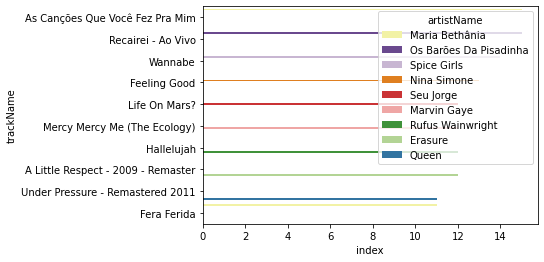

In [ ]:
# Quantidade de vezes que a musica tocou separado por artista e musica
musica_artista = spotify[['artistName','trackName','index']].groupby(['artistName','trackName'],as_index=False).agg({'index':'count'}).reset_index()
musica_artista = musica_artista.sort_values(by='index',ascending=False).head(10)
sns.barplot(x='index', y='trackName', data=musica_artista, hue="artistName",palette='Paired_r')

In [ ]:
musica_artista.to_csv('/content/musica_artista.csv')

,tempoEscutado(h)
mes,
3,19.4951
4,107.6664
5,97.6708
6,87.6470
7,56.8207


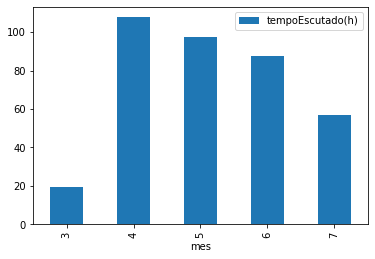

In [ ]:
tempo_total = spotify.groupby(['mes']).agg({'tempoEscutado(h)':'sum'})
spotify.groupby(['mes']).agg({'tempoEscutado(h)':'sum'}).plot(kind='bar')

tempo_total

In [ ]:
type (tempo_total)

pandas.core.frame.DataFrame

In [ ]:
tempo_total.to_csv('/content/tempo_total.csv')

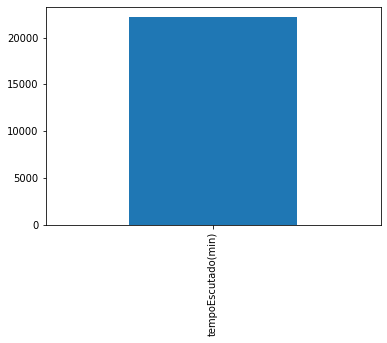

In [ ]:
# Tempo total em minutos 
tempo_min = spotify['tempoEscutado(min)'].agg({'tempoEscutado(min)':'sum'}).plot(kind='bar')
tempo_min

In [ ]:
#Dias da semana tempo escutado em cada dia
dia_semana = spotify.groupby(['nomeDia']).agg({'tempoEscutado(min)':'sum'}).plot(kind='bar')
dia_semana

In [ ]:
# tempo escutado em minutos ao longo de 2021
nesseAno = spotify.groupby(['mes','ano'],as_index=False).agg({'tempoEscutado(min)':'count'}).reset_index().drop(columns='index')
nesseAno = nesseAno.loc[nesseAno['ano'] == 2021]
nesseAno.plot(kind='line',x='mes',y='tempoEscutado(min)')
# datas

In [ ]:
nesseAno.to_csv('/content/nesseAno.csv')

In [ ]:
spotify.groupby(['artistName'],as_index=False).agg({'tempoEscutado(min)':'sum'}).sort_values(by='tempoEscutado(min)',ascending=False).reset_index().drop(columns='index')

In [ ]:
spotify.to_csv('spotify.csv', index = None)

In [ ]:
spotify.head()


In [ ]:
spotify.tail()
